In [13]:

from bitstring import BitArray, BitStream

a = BitArray(float=-3.173884, length=64)
a.bin

'1100000000001001011001000001110101001011011010100110000110011110'

In [15]:

a.invert()
a.float

-3.173884

In [ ]:

'''
Outlier detection with one-class SVMs and robust covariance estimation.
One-class SVM is designed for novelty detection.
Robust covariance estimation is designed for outlier detection.
Code is modify from example in scikit-learn http://scikit-learn.org/stable/_downloads/plot_outlier_detection.py
Copyright @ Hongyu Su (hongyu.su@me.com)
'''
print (__doc__)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.2875, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.2875, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.2875, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.2875, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

(-7.0, 7.0, -7.0, 7.0)

(-7, 7)

(-7, 7)

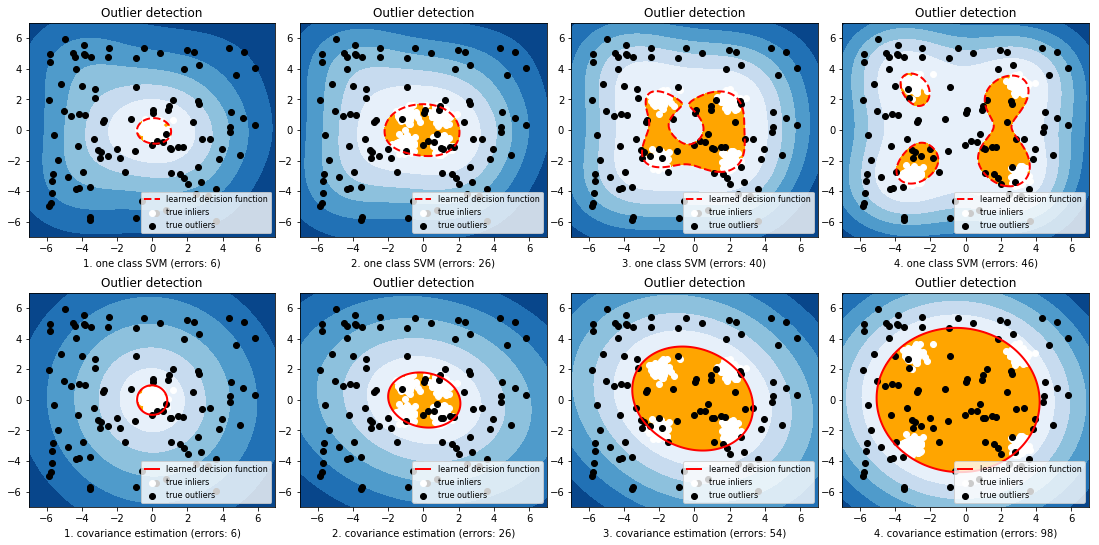

In [21]:

%matplotlib inline

# scikit-learn package
from sklearn import svm
from sklearn.covariance import EllipticEnvelope

# numpy
import numpy as np

# plot
import matplotlib.pyplot as plt
import matplotlib.font_manager
from scipy import stats

n_samples=400
outliers_fraction=0.25
clusters_separation=[0,1,2,3]

# define classifier
classifiers = {'one class SVM': svm.OneClassSVM(nu=0.95*outliers_fraction+0.05,kernel='rbf',gamma=0.1),
               'covariance estimation': EllipticEnvelope(contamination=0.1)}
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)
ground_truth = np.ones(n_samples, dtype=int)
ground_truth[-n_outliers:] = 0

# Fit the problem with varying cluster separation
plt.figure(figsize=(16,8))
for i, offset in enumerate(clusters_separation):
    np.random.seed(42)
    
    # generate inlier, gaussian
    x = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) - offset
    y = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) - offset
    X1 = np.r_[x,y].reshape((2,x.shape[0])).T
    x = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) - offset
    y = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) + offset
    X2 = np.r_[x,y].reshape((2,x.shape[0])).T
    x = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) + offset
    y = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) - offset
    X3 = np.r_[x,y].reshape((2,x.shape[0])).T
    x = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) + offset
    y = 0.3 * np.random.randn(int(0.25 * n_inliers), 1) + offset
    X4 = np.r_[x,y].reshape((2,x.shape[0])).T
    X = np.r_[X1, X2, X3, X4]
    
    # generate outlier, uniform
    X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 2))]
    
    # Fit the model with the One-Class SVM
    for j, (clf_name, clf) in enumerate(classifiers.items()):
        
        # fit the data and tag outliers
        clf.fit(X)
        y_pred = clf.decision_function(X).ravel()
        threshold = stats.scoreatpercentile(y_pred,100 * outliers_fraction)
        y_pred = y_pred > threshold
        n_errors = (y_pred != ground_truth).sum()
        
        # plot the levels lines and the points
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        subplot = plt.subplot(2, 4, (j)*4+i+1)
        subplot.set_title("Outlier detection")
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black')
        subplot.axis('tight')
        subplot.legend(
            [a.collections[0], b, c],
            ['learned decision function', 'true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=8))
        subplot.set_xlabel("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
    plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)

In [2]:

!pip install cython fortran-magic

In [9]:

%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [10]:

%%cython

def myltiply_by_2(float x):
    return 2.0 * x

In [11]:

myltiply_by_2(23.)

46.0

In [12]:

%load_ext fortranmagic

/Users/davebabbitt/anaconda/lib/python3.6/site-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [13]:

%%fortran
subroutine compute_fortran(x, y, z)
    real, intent(in) :: x(:), y(:)
    real, intent(out) :: z(size(x, 1))

    z = sin(x + y)

end subroutine compute_fortran

In [14]:

compute_fortran([1, 2, 3], [4, 5, 6])

array([-0.95892429,  0.65698659,  0.41211849], dtype=float32)

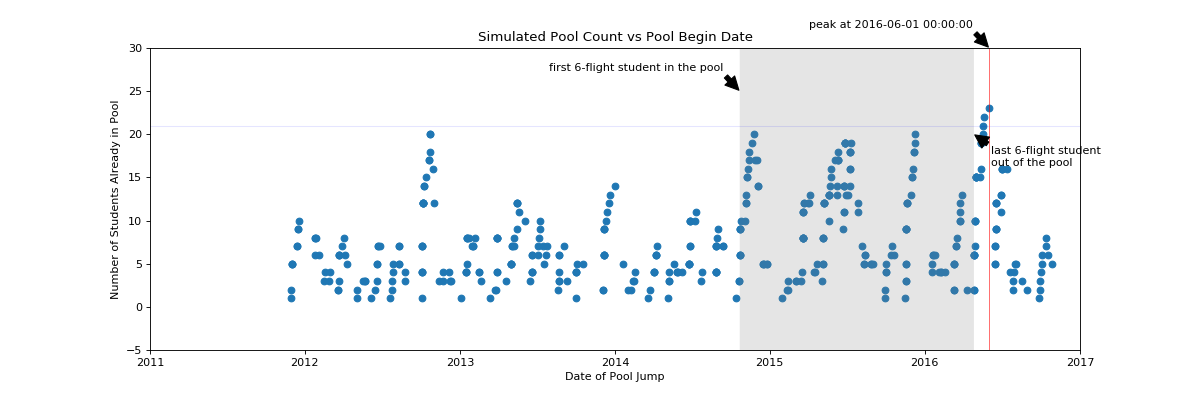

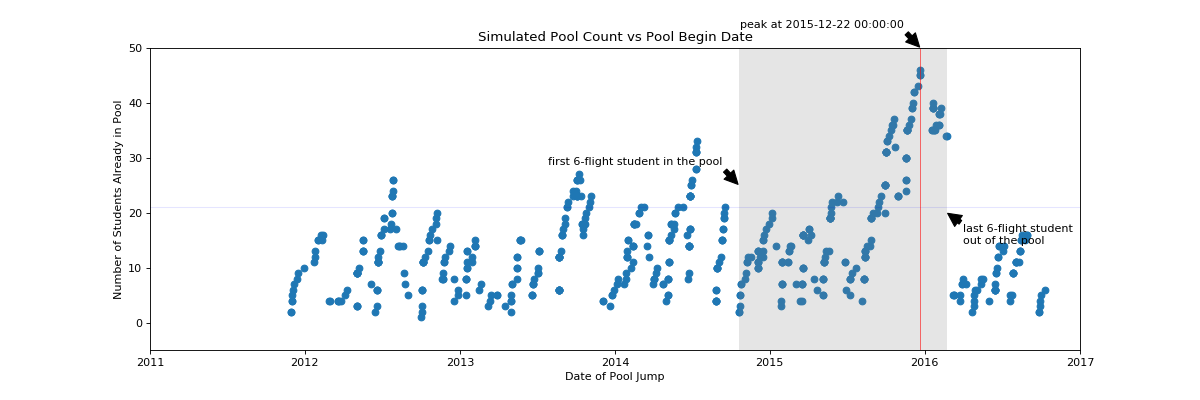

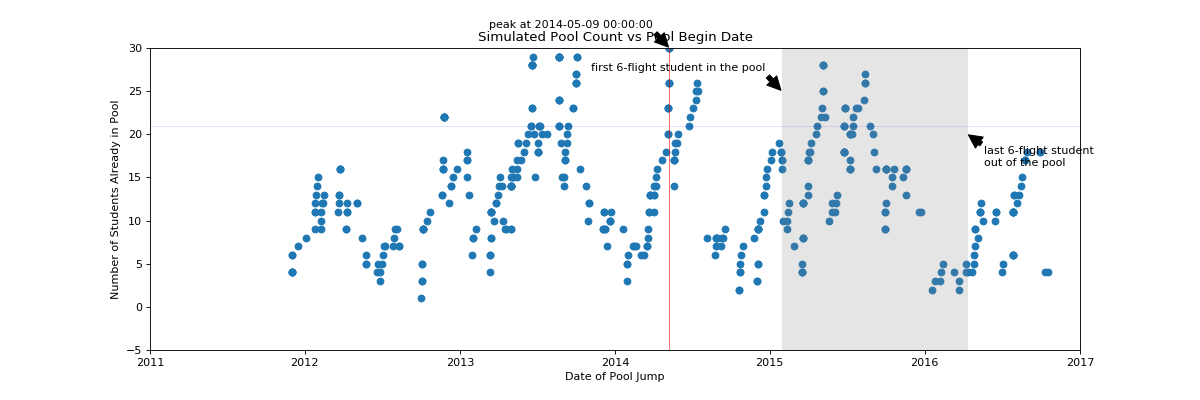

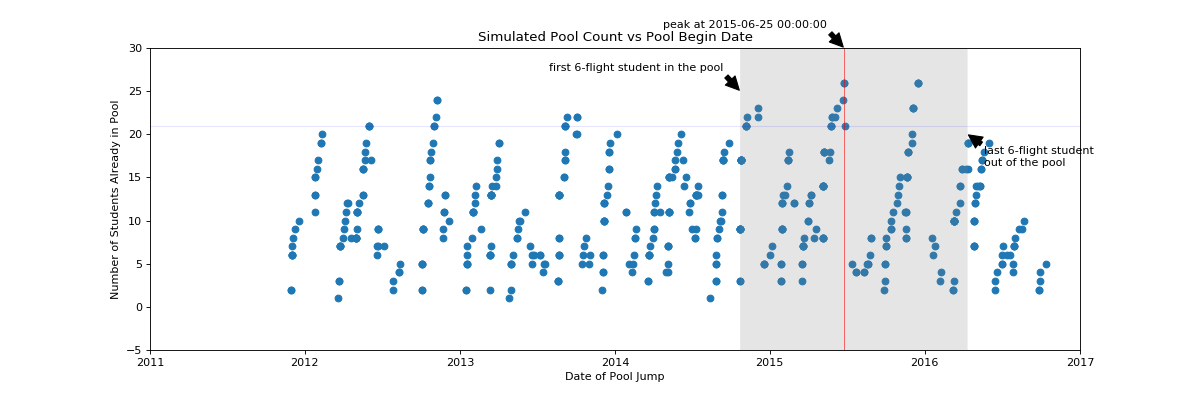

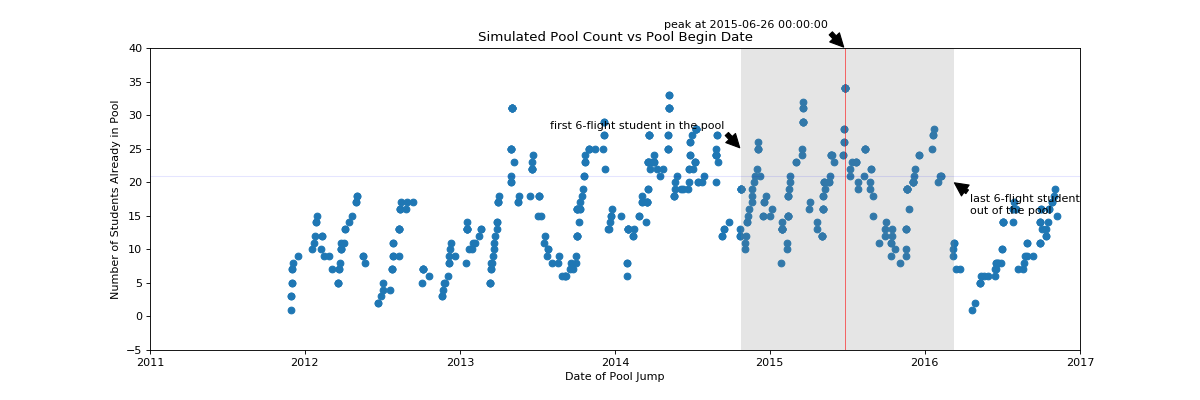

In [27]:

import os
from IPython.display import display, Image

folder_path = './Offutt-AFB-Data-Science/saves/interactive/png/'
names = [f for f in os.listdir(folder_path) if f.endswith('.png')]
for name in names[:5]:
    display(Image(folder_path + name, width=1000))

In [24]:

names = !ls ./Offutt-AFB-Data-Science/saves/interactive/png/*.png
names[:5]

['./Offutt-AFB-Data-Science/saves/interactive/png/plot_10_10_10_7_6_10_23_6_15_10_15_14_8_6_15_5_9_9_13_13_21_8_6_19_23_24_6_10_18_9_15_23_20_5_11_3.png',
 './Offutt-AFB-Data-Science/saves/interactive/png/plot_10_11_12_6_9_5_11_16_9_20_21_20_22_13_11_9_18_21_7_10_8_18_11_24_11_24_8_12_6_5_7_11_5_18_6_3.png',
 './Offutt-AFB-Data-Science/saves/interactive/png/plot_10_11_14_23_6_5_24_8_15_20_13_7_22_11_20_8_17_24_14_19_21_7_22_14_24_6_8_17_19_5_21_20_8_9_14_3.png',
 './Offutt-AFB-Data-Science/saves/interactive/png/plot_10_11_15_7_6_20_5_12_14_18_19_16_10_24_13_18_23_20_19_14_22_12_22_14_22_20_11_10_21_8_8_6_14_13_20_3.png',
 './Offutt-AFB-Data-Science/saves/interactive/png/plot_10_11_24_21_12_17_9_13_13_21_18_16_6_22_21_21_23_17_8_22_22_7_7_20_23_5_7_10_11_16_24_6_16_15_14_3.png']

In [25]:

%pycat /Users/davebabbitt/anaconda/lib/python3.6/site-packages/ipywidgets/widgets/interaction.py

$M = \begin{bmatrix}
       \frac{5}{6} & \frac{1}{6} & 0           \\[0.3em]
       \frac{5}{6} & 0           & \frac{1}{6} \\[0.3em]
       0           & \frac{5}{6} & \frac{1}{6}
     \end{bmatrix}$

In [1]:

%load_ext octavemagic

ModuleNotFoundError: No module named 'octavemagic'

In [3]:

%octave

ERROR:root:Line magic function `%octave` not found.


In [2]:

!pip install octave_kernel

In [3]:

!python -m octave_kernel.install

In [4]:

!jupyter console --kernel octave

Traceback (most recent call last):
  File "/Users/davebabbitt/anaconda/lib/python3.6/site-packages/jupyter_console/ptshell.py", line 323, in init_kernel_info
    reply = self.client.get_shell_msg(timeout=1)
  File "/Users/davebabbitt/anaconda/lib/python3.6/site-packages/jupyter_client/client.py", line 77, in get_shell_msg
    return self.shell_channel.get_msg(*args, **kwargs)
  File "/Users/davebabbitt/anaconda/lib/python3.6/site-packages/jupyter_client/blocking/channels.py", line 57, in get_msg
    raise Empty
queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/davebabbitt/anaconda/bin/jupyter-console", line 5, in <module>
    app.main()
  File "/Users/davebabbitt/anaconda/lib/python3.6/site-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/davebabbitt/anaconda/lib/python3.6/site-packages/traitlets/confi

In [ ]:

%load_ext oct2py.ipython

In [1]:

%load_ext watermark

In [2]:

%watermark -d -u -v

last updated: 2017-10-13 

CPython 3.6.1
IPython 6.1.0
